# I. INTRODUCCIÓN

## 1.1. Importamos librerias

In [2]:
import pandas as pd
#visualizacion de datos
import matplotlib.pyplot as plt 
import seaborn as sns 
#Remover las letras vacias
from nltk.corpus import stopwords
import nltk
#creado de nuve
from wordcloud import WordCloud
#Modelado
from sklearn.model_selection import train_test_split, StratifiedKFold,GridSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
# MODELOS CLASIFICADORES DE MACHINE LEARNING 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

# METRICAS PARA ENTRENAMIENTO Y VALIDACION DEL MODELO
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
#Separar los datos
from sklearn.model_selection import train_test_split 
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
#identificar los valores perdidos
import missingno as msno




1.   matplotlib para
2.   pandas para



## 1.2. Carga de Dataset

In [3]:
data=pd.read_csv("https://raw.githubusercontent.com/EdithCanelo/Practicarepositorio2021/main/violenciacontramujer.csv", delimiter="$")

In [4]:
type(data)

pandas.core.frame.DataFrame

Traemos de GitHub

# II. COMPRENSIÓN DE DATOS

##2.1. Dimensiones del conjunto de datos

Con la propiedad `shape` Podemos tener una idea rápida de cuántas instancias (filas) y cuántos atributos (columnas) hay en nuestro conjunto de datos.

In [5]:
# shape
data.shape

(167, 28)

**Se muestra:** 
- **167** instancias
- **28** atributos

##2.2. Visualización de datos

Con la función `head()` para poder ver cómo están representados los datos. 

In [6]:
# head
data.head(5)

,Edad,Numero hijas,Numero de hijos,Gestacion,Estado civil conyugal,Nivel educativo,Percibe Remuneracion,Ocupación,dedica,Edad.1,...,primera vez en ser agredida,Frecuencia,Estado del agresor,vive con agresor,Es celoso,Problema de alcohol,problema economico,estrés,control de visita,control de gasto
0,25,0,0,No,Separada,Superior técnico incompleto,No,NaN,NaN,27,...,Si,Intermitente,Sobrio,No,Infrecuente,Infrecuente,Infrecuente,Infrecuente,Infrecuente,Infrecuente
1,28,0,0,No,Soltera,Superior universitario incompleto,No,NaN,Estudia,29,...,Ninguna,Ninguna,Ninguna,No,Nada frecuente,Infrecuente,Nada frecuente,Frecuente,Nada frecuente,Nada frecuente
2,40,1,1,No,Conviviente,Superior universitario completo,Si,TRABAJO SECTOR PUBLICO,NaN,48,...,No,Intermitente,Sobrio,Si,Infrecuente,Nada frecuente,Nada frecuente,Infrecuente,Nada frecuente,Nada frecuente
3,27,1,0,No,Conviviente,Superior técnico completa,Si,Dueña de un taller de costura,NaN,33,...,No,Intermitente,Efec. alcohol,No,Frecuente,Infrecuente,Infrecuente,Frecuente,Frecuente,Infrecuente
4,27,0,0,No,Soltera,Superior universitario incompleto,No,NaN,Estudia,26,...,Si,NaN,Sobrio,No,Frecuente,Frecuente,Infrecuente,Frecuente,Nada frecuente,Nada frecuente


Se muestra las **5 primeras filas** de los datos 

**Observación**
El nombre de las características o atributos o columnas están escritos de forma separada ejemplo: Numero de hijos --> se recomienda poner ´numero_hijos´ y todo con minúscula.

##2.3. Resumen estadístico

Echaremos un vistazo a un resumen de cada atributo con la función `describe´()`. Esto incluye la media, los valores mínimo y máximo, así como algunos percentiles.

In [7]:
# describe
data.describe()

,Edad
count,167.000000
mean,37.011976
std,13.267402
min,18.000000
25%,27.000000
50%,34.000000
75%,48.500000
max,70.000000


De estos datos obtenidos se tiene las siguiente conclusiones:

La variable `Edad` cuenta con:
* 167 datos de emtrada.
* Nuestra edad mínima es 18
* Nuestra edad máxima el 70 años
* El promedio de las edades es 37 años
* Una desviasción estandar de 13.267, la distribución de los datos
* El 25% de la edad de mujeres son menores o iguales a 27 años.
* El 50% de la edad de mujeres son menores o iguales a 34 años.
* El 75% de la edad de mujeres son menores o iguales a 48.5 años


##2.4. Distribución de clase


Cantidad de instancias (filas) que pertenecen a cada clase. Podemos ver esto como una cuenta absoluta y como un porcentaje con la función `groupby('class').size()`

In [8]:
# Distribución de la Clase
data.groupby('tipo violencia').size()

tipo violencia
Física                          3
Física; Psicológica            40
Física; Psicológica; Sexual     5
Ninguna                        44
Psicológica                    75
dtype: int64

Muestra cómo se encuentra clasificado la columna `tipo Violencia`.
* Hay 3 mujeres con violencia física.
* Hay 5 mujeres con casos extremos de violencia física, sexual y psicológica.
* Son 75 mujeres que tuvieron solo violencia psicológica

# III. PREPARACIÓN DE DATOS

## 3.1. Mujer

Extraemos del dataframe los atributos que corresponden a mujer

In [9]:
mujer_data=data[["tipo violencia","Edad","Numero hijas","Numero de hijos","Gestacion","Estado civil conyugal","Nivel educativo","Percibe Remuneracion","Ocupación","dedica"]]

### 3.1.1. Renombre de Columna

In [10]:
#Renombe de atributos de tabla mujer
mujer_data = mujer_data.rename(columns={"tipo violencia":"tipo_violencia",'Edad': 'edad', 'Numero hijas': 'hijas','Numero de hijos': 'hijos',
                                        'Gestacion': 'gestacion','Estado civil conyugal': 'estado_civil','Nivel educativo': 'nivel_educativo',
                                        'Percibe Remuneracion': 'trabaja','Ocupación': 'ocupacion', 'dedica': 'dedicacion'})

In [11]:
mujer_data.head()

,tipo_violencia,edad,hijas,hijos,gestacion,estado_civil,nivel_educativo,trabaja,ocupacion,dedicacion
0,Psicológica,25,0,0,No,Separada,Superior técnico incompleto,No,NaN,NaN
1,Ninguna,28,0,0,No,Soltera,Superior universitario incompleto,No,NaN,Estudia
2,Psicológica,40,1,1,No,Conviviente,Superior universitario completo,Si,TRABAJO SECTOR PUBLICO,NaN
3,Psicológica,27,1,0,No,Conviviente,Superior técnico completa,Si,Dueña de un taller de costura,NaN
4,Psicológica,27,0,0,No,Soltera,Superior universitario incompleto,No,NaN,Estudia


Se muestra la tabla de mujer con sus características renombradas.


### 3.1.2. Unión de cantidas de hijos e hijas

In [12]:
def unir_hijos(hijos,hijas):
  hijos_total=0
  hijas_total=0
  try:
    hijos_total=int(hijos)
  except:
    hijos_total=0
  try:
    hijas_total=int(hijas)
  except:
    hijas_total=0
  return hijos_total+hijas_total

  
mujer_data["total_hijos"]=mujer_data.apply(lambda x: unir_hijos(x["hijos"],x["hijas"]), axis = 1)

In [13]:
mujer_data.head(3)

,tipo_violencia,edad,hijas,hijos,gestacion,estado_civil,nivel_educativo,trabaja,ocupacion,dedicacion,total_hijos
0,Psicológica,25,0,0,No,Separada,Superior técnico incompleto,No,NaN,NaN,0
1,Ninguna,28,0,0,No,Soltera,Superior universitario incompleto,No,NaN,Estudia,0
2,Psicológica,40,1,1,No,Conviviente,Superior universitario completo,Si,TRABAJO SECTOR PUBLICO,NaN,2


Se tiene una nueva caracteristica con *total_hijos* donde contiene la suma de hijas e hijos

In [14]:
#Elimo hijos,hijas
mujer_data=mujer_data.drop(['hijos', 'hijas'], axis=1)

In [15]:
mujer_data.head(2)

,tipo_violencia,edad,gestacion,estado_civil,nivel_educativo,trabaja,ocupacion,dedicacion,total_hijos
0,Psicológica,25,No,Separada,Superior técnico incompleto,No,NaN,NaN,0
1,Ninguna,28,No,Soltera,Superior universitario incompleto,No,NaN,Estudia,0


ya no se tiene a hijos ni hijas, en su lugar se reemplazo el *total_hijos*.


### 3.1.3. Unión de ocupación y dedicación

In [16]:
ocupacion=mujer_data[["ocupacion","dedicacion"]]
ocupacion.head()

,ocupacion,dedicacion
0,NaN,NaN
1,NaN,Estudia
2,TRABAJO SECTOR PUBLICO,NaN
3,Dueña de un taller de costura,NaN
4,NaN,Estudia


In [17]:
def unir_ocupacion(ocupacion,dedicacion):
  """ Esta funcion une las columnas de ocupacion y dedicacion, retorna una sola columna llamada oficio"""
  resultado=""
  if type(ocupacion) is float:
    resultado=dedicacion
  else:
    resultado=ocupacion
  return resultado
  
mujer_data["oficio"] = mujer_data.apply(lambda x: unir_ocupacion(x["ocupacion"],x["dedicacion"]), axis= 1)

In [18]:
mujer_data.head(5)

,tipo_violencia,edad,gestacion,estado_civil,nivel_educativo,trabaja,ocupacion,dedicacion,total_hijos,oficio
0,Psicológica,25,No,Separada,Superior técnico incompleto,No,NaN,NaN,0,NaN
1,Ninguna,28,No,Soltera,Superior universitario incompleto,No,NaN,Estudia,0,Estudia
2,Psicológica,40,No,Conviviente,Superior universitario completo,Si,TRABAJO SECTOR PUBLICO,NaN,2,TRABAJO SECTOR PUBLICO
3,Psicológica,27,No,Conviviente,Superior técnico completa,Si,Dueña de un taller de costura,NaN,1,Dueña de un taller de costura
4,Psicológica,27,No,Soltera,Superior universitario incompleto,No,NaN,Estudia,0,Estudia


In [19]:
#borro las columnas ocupacion y dedicacion
mujer_data=mujer_data.drop(['ocupacion', 'dedicacion'], axis=1)

###3.1.4. Etiquetado de datos, asignación de clase

In [20]:
def etiquetado(x):
  """" esta funcion crea una columna con la clase de las caracteristicas """
  if x=="Ninguna":
    return 0
  return 1

In [21]:
mujer_data["clase"]=mujer_data["tipo_violencia"].apply(lambda x: etiquetado(x))

In [22]:
mujer_data.head(2)

,tipo_violencia,edad,gestacion,estado_civil,nivel_educativo,trabaja,total_hijos,oficio,clase
0,Psicológica,25,No,Separada,Superior técnico incompleto,No,0,NaN,1
1,Ninguna,28,No,Soltera,Superior universitario incompleto,No,0,Estudia,0


In [23]:

#Elimino tipo_violencia y oficio
mujer_data.drop(["tipo_violencia","oficio"],axis=1, inplace=True)

In [24]:
mujer_data.head(3)

,edad,gestacion,estado_civil,nivel_educativo,trabaja,total_hijos,clase
0,25,No,Separada,Superior técnico incompleto,No,0,1
1,28,No,Soltera,Superior universitario incompleto,No,0,0
2,40,No,Conviviente,Superior universitario completo,Si,2,1


Hay las variables para mujer que se van a usar para el análisis 

###3.1.5. Cambio de Abreviatura a Nivel Educativo

La variable **nivel_educativo** cuenta con mucho texto, se pasará a hacer un acrónimo

In [25]:
def acronimo_nivelE(x):

  if x=="Sin nivel":
    return "SN"
  elif x=="Inicial":
    return "NI"
  elif x=="Primaria completa":
    return "PC"
  elif x=="Primaria incompleta":
    return "PI"
  elif x=="Superior técnico completa":
    return "STC"
  elif x=="Secundaria incompleta":
    return "SI"
  elif x=="Secundaria completa":
    return "SC"
  elif x=="Superior técnico incompleto":
    return "STI"
  elif x=="Superior universitario incompleto":
    return "SUI"
  elif x=="Superior universitario completo":
    return "SUC"
  else:
    return ""
mujer_data["nivel_educativo"]=mujer_data["nivel_educativo"].apply(lambda x: acronimo_nivelE(x))
mujer_data.head()

,edad,gestacion,estado_civil,nivel_educativo,trabaja,total_hijos,clase
0,25,No,Separada,STI,No,0,1
1,28,No,Soltera,SUI,No,0,0
2,40,No,Conviviente,SUC,Si,2,1
3,27,No,Conviviente,STC,Si,1,1
4,27,No,Soltera,SUI,No,0,1


###3.1.6. Análisis de variables

Analizamos las variables en relacion a la clase (Cuando hay Violencia o cuando no hay violencia)

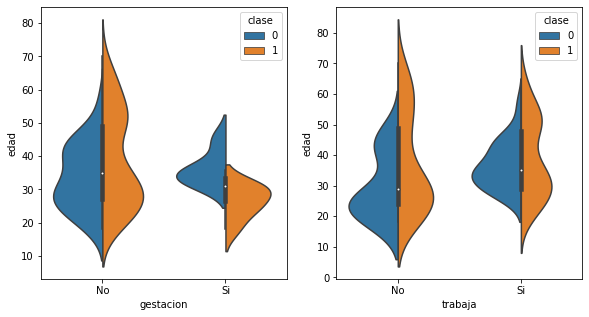

In [26]:

fig = plt.figure(figsize=(15,5))
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

sns.violinplot(x="gestacion", y="edad", hue="clase", data=mujer_data, split=True, ax=ax2)
sns.violinplot(x="trabaja", y="edad", hue="clase", data=mujer_data, split=True, ax=ax3)


1. Gestacion y Edad
  * Las mujeres de 28-32 años, que no estan gestando, tienen una probabilidad similar a ser violentadas o no. 
  * No existe mujer con edades que comprenden los 18 y 22 años, que esten gestando y que no hayan sido violentadas. 
2. Trabajo y Edad
  * independientemente del trabajo que disponga la mujer, la mujer siempre tiende a ser violentada.

In [27]:
#Elinamos el atributo Trabaja
mujer_data.drop(["trabaja"],axis=1, inplace=True)
mujer_data.head(2)

,edad,gestacion,estado_civil,nivel_educativo,total_hijos,clase
0,25,No,Separada,STI,0,1
1,28,No,Soltera,SUI,0,0


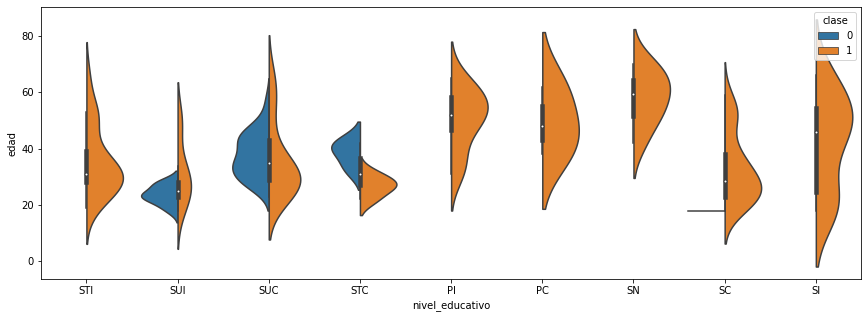

In [28]:
#Nivel educativo, edad y clase
fig = plt.figure(figsize=(50,5))
ax2 = fig.add_subplot(132)
sns.violinplot(x="nivel_educativo", y="edad", hue="clase", data=mujer_data, split=True, ax=ax2)

3. Nivel Educativo y Edad

  *   A medida que el nive educativo sea inferior tiene mayores posibilidades a ser violentada.
  *   El tener la universidad completa entre las edades de 25 a 30 años no determina a no ser violentada.




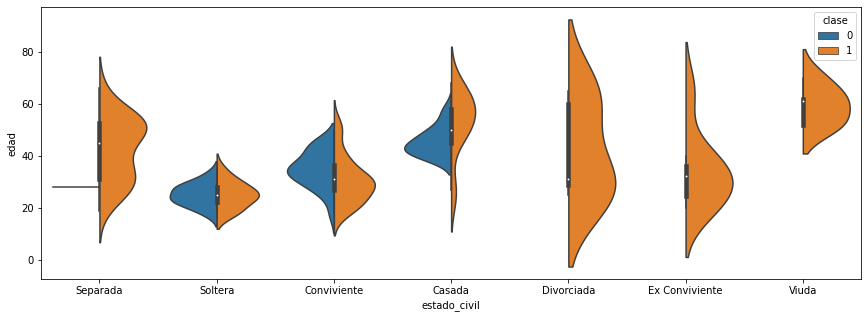

In [29]:
#Estado civil, edad y clase
fig = plt.figure(figsize=(50,5))
ax2 = fig.add_subplot(132)
sns.violinplot(x="estado_civil", y="edad", hue="clase", data=mujer_data, split=True, ax=ax2)

4. Estado civil y Edad

  *   Las mujeres separadas, divorciadas, exconviniente fueron violentadas.
  *   Estar soltera no determina a no ser violentada.
  *  Las mujeres casadas entre las edades de los 25 años a los 40 tienen mayor probabilidad a no ser violentadas. 




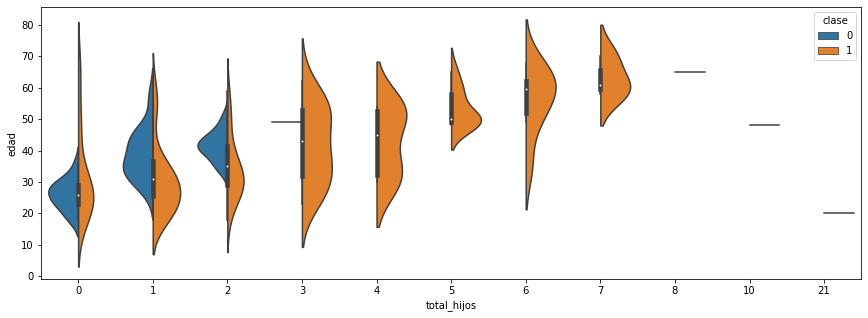

In [30]:
# Total de hijos, edad y clase
fig = plt.figure(figsize=(50,5))
ax2 = fig.add_subplot(132)
sns.violinplot(x="total_hijos", y="edad", hue="clase", data=mujer_data, split=True, ax=ax2)

5. Total de hijos y Edad

  *   Mientras más hijos cuente una mujer tiene mayores probabilidades de ser violentada.
  *   Las mujeres de 50 a 60 años presentan mas hijos y son más violentadas.
  * Hay mujeres que no cuentan con hijos entre los 22 a 25 que no fueron violentadas.



## 3.2. Hombre

In [31]:
hombre_data=data[["tipo violencia","Edad.1","Nivel educativo.1","Percibe remuneracion","Ocupación","dedica.1"]]

###3.2.1. Renombre de la Columna

In [32]:
hombre_data = hombre_data.rename(columns={"tipo violencia":"tipo_violencia",'Edad.1': 'edad', 
                                          'Nivel educativo.1': 'nivel_educativo', 'Percibe remuneracion': 'trabaja', 
                                          'Ocupación': 'ocupacion', 'dedica.1': 'dedicacion'})

###3.2.2. Asignación de Clase

In [33]:
#Determino la clase para su análsisis
hombre_data["clase"]=hombre_data["tipo_violencia"].apply(lambda x: etiquetado(x))
hombre_data.drop(["tipo_violencia"],axis=1, inplace=True)

In [34]:
hombre_data.head(2)

,edad,nivel_educativo,trabaja,ocupacion,dedicacion,clase
0,27,Primaria incompleta,Si,NaN,NaN,1
1,29,Superior universitario incompleto,Si,NaN,NaN,0


###3.2.3. Unión de Ocupación y edicación

In [35]:
hombre_data["oficio"] = hombre_data.apply(lambda x: unir_ocupacion(x["ocupacion"],x["dedicacion"]), axis= 1)

In [36]:
#borramos las atributos ocupacion y dedicacion
hombre_data=hombre_data.drop(['ocupacion', 'dedicacion'], axis=1)

In [37]:
hombre_data.head(3)

,edad,nivel_educativo,trabaja,clase,oficio
0,27,Primaria incompleta,Si,1,NaN
1,29,Superior universitario incompleto,Si,0,NaN
2,48,Superior universitario incompleto,No,1,TRABAJO SECTOR PUBLICO


###3.2.4. Cambio de abreviatura a Nivel Educatvo

In [38]:
hombre_data["nivel_educativo"]=hombre_data["nivel_educativo"].apply(lambda x: acronimo_nivelE(x))

In [39]:
#Ubico al sesenta
hombre_data.loc[hombre_data.edad == "Sesenta", 'edad'] = 60

In [40]:
#Verificamos el cambio
hombre_data.loc[hombre_data["edad"]==60]

,edad,nivel_educativo,trabaja,clase,oficio
100,60,SI,Si,1,Comerciante


###3.2.5. Análisis de variable en relación a los casos de Violencia

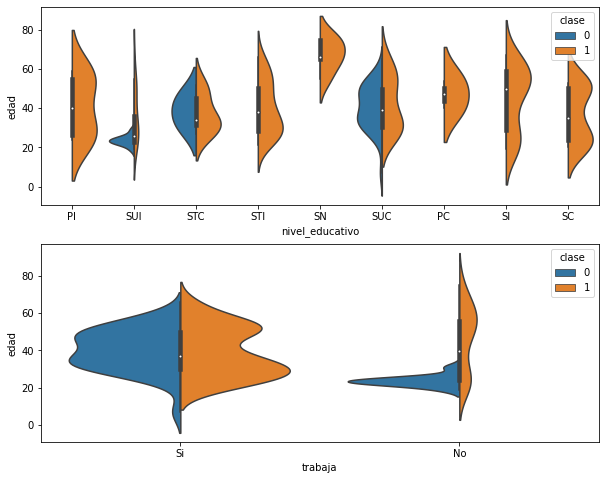

In [41]:
hombre_data["edad"]=hombre_data["edad"].astype(int)

fig = plt.figure(figsize=(10,8))
ax2 = fig.add_subplot(211)
ax3 = fig.add_subplot(212)
#Nivel educativo y edad
sns.violinplot(x="nivel_educativo", y="edad", hue="clase", data=hombre_data, split=True, ax=ax2)
#Trabaja y edad
sns.violinplot(x="trabaja", y="edad", hue="clase", data=hombre_data, split=True, ax=ax3)

1. Nivel Educativo y Edad
* Los hombres que cuentan sin nivel educativo tienen maypr probabilidad a violentar a las mujeres.
* A menor inferior de Nivel Educacional tienden a violentar a las mujeres.
* Los hombres en Superior Universitaria Incompleta entre las edades de los 20 a 25 tienen mayor probabilidad a no ser violentas.
2. Trabaja y Edad
* Los hombres que trabajan y no al menos una vez en su vida han violentado a una mujer a excepción de la edad de los 18 a 22.

In [42]:
#Eliminamos trabaja y oficio
hombre_data.drop(["trabaja","oficio"],axis=1, inplace=True)
hombre_data.head(2)

,edad,nivel_educativo,clase
0,27,PI,1
1,29,SUI,0


## 3.3. Violencia

In [43]:
violencia_data=data[["Edad.1","tipo violencia","violencia fisica","violencia psicologica","violencia sexual","primera vez en ser agredida","Frecuencia",
                     "Estado del agresor","vive con agresor","Es celoso","Problema de alcohol","problema economico","estrés",
                     "control de visita","control de gasto"]]

###3.3.1. Renombre de Columna

In [44]:
violencia_data = violencia_data.rename(columns={'Edad.1': 'edad', 'tipo violencia': 'tipo_violencia', 'violencia fisica': 'violencia_fisica',
                                                'violencia psicologica': 'violencia_pscicologica', 'violencia sexual': 'violencia_sexual', 
                                                'primera vez en ser agredida': 'primera_agresion', 'Frecuencia': 'frecuencia',
                                                'Estado del agresor': 'estado_agresor','vive con agresor': 'convive','Es celoso': 'celoso',
                                                'Problema de alcohol': 'problema_alcohol','problema economico': 'problema_economico','estrés': 'estres',
                                                'control de visita': 'controla_visitas','control de gasto': 'control_gastos'})

In [45]:
violencia_data.head(4)

,edad,tipo_violencia,violencia_fisica,violencia_pscicologica,violencia_sexual,primera_agresion,frecuencia,estado_agresor,convive,celoso,problema_alcohol,problema_economico,estres,controla_visitas,control_gastos
0,27,Psicológica,Bofetadas,Gritos e insultos; Indiferencia; Rechazo; Desv...,Acoso sexual,Si,Intermitente,Sobrio,No,Infrecuente,Infrecuente,Infrecuente,Infrecuente,Infrecuente,Infrecuente
1,29,Ninguna,NaN,Indiferencia; Desvalorización y humillación; R...,NaN,Ninguna,Ninguna,Ninguna,No,Nada frecuente,Infrecuente,Nada frecuente,Frecuente,Nada frecuente,Nada frecuente
2,48,Psicológica,NaN,Indiferencia,NaN,No,Intermitente,Sobrio,Si,Infrecuente,Nada frecuente,Nada frecuente,Infrecuente,Nada frecuente,Nada frecuente
3,33,Psicológica,NaN,Gritos e insultos; Indiferencia; Desvalorizaci...,NaN,No,Intermitente,Efec. alcohol,No,Frecuente,Infrecuente,Infrecuente,Frecuente,Frecuente,Infrecuente


###3.3.2. Remover palabras vacías

In [46]:
# se removeran las palabas vacias(stopword: palabras que no suman a la intepretacion de la idea(nube)),
#usando la librería NLTK
nltk.download('stopwords')
stopword_spanish=stopwords.words('spanish')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [47]:
def generar_texto(tipo_violencia):
  texto=" "
  for i in range(len(tipo_violencia)):
    if (type(tipo_violencia.iloc[i]) is float):
      texto+=""
    else:
      # [gritos, e ,insultos, indiferencia, rechazo, desv]
      # quitar stopword, estamos separando el texto en palabras
      texto_caracteristica=[x.replace(",","") for x in tipo_violencia.iloc[i].split(" ")]
      for palabra in texto_caracteristica:
        if palabra not in stopword_spanish:
          texto+=palabra+ " "
  return texto

###3.2.3. Creación de Nube de palabras

In [48]:
violencia_psicologica_texto=generar_texto(violencia_data["violencia_pscicologica"])
violencia_fisica_texto=generar_texto(violencia_data["violencia_fisica"])
violencia_sexual_texto=generar_texto(violencia_data["violencia_sexual"])

## creamos el texto para la nube de palabras
word_cloud_psico = WordCloud(max_font_size=500,collocations = False, background_color = 'white').generate(violencia_psicologica_texto)
word_cloud_fisi = WordCloud(max_font_size=500,collocations = False, background_color = 'white').generate(violencia_fisica_texto)
word_cloud_sex = WordCloud(max_font_size=500,collocations = False, background_color = 'white').generate(violencia_sexual_texto)

Text(0.5, 1.0, 'Violencia Sexual')

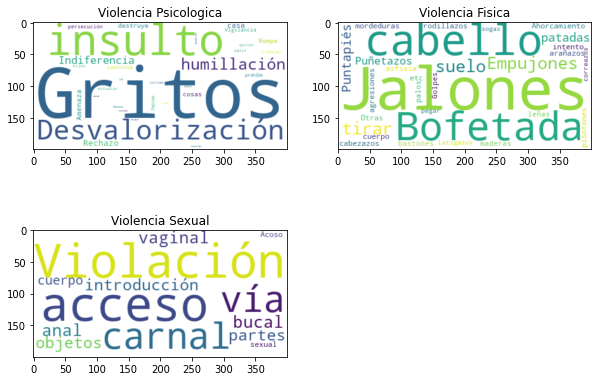

In [49]:
# Creamos la figura
fig = plt.figure(figsize=(10, 7))
# establecer valores en variables de filas y columnas
rows = 2
columns = 2

# Agrega una subtrama en la primera posición
fig.add_subplot(rows, columns, 1)
# mostrando imagen
plt.imshow(word_cloud_psico, interpolation='bilinear')
plt.axis('on')
plt.title("Violencia Psicologica")

# Agrega una subtrama en la segunda posición
fig.add_subplot(rows, columns, 2)
# mostrando imagen
plt.imshow(word_cloud_fisi, interpolation='bilinear')
plt.axis('on')
plt.title("Violencia Fisica")

# Agrega una subtrama en la tercera posición
fig.add_subplot(rows, columns, 3)
# mostrando imagen
plt.imshow(word_cloud_sex, interpolation='bilinear')
plt.axis('on')
plt.title("Violencia Sexual")

1. Violencia Psicológica

  Las mujeres afirman: son los Gritos, insultos, las desvalorizaciones, la humillación, la indiferencia entre otros que reciben más.
2. Violencia Física

  Las mujeres afirman: Son los jalones de cabello, los empujones, las bofetadas, tirar al suelo los puñetasos entre otros, son los que les sucede cuando le violentan de forma física.

3. Violencia Sexual

  Las mujeres afirman: La violación carnal, la introduccción vaginal entre otros son los que mpas sufren.

###3.2.4. Asignación de clase

In [50]:
#clase
violencia_data["clase"]= violencia_data["tipo_violencia"].apply(lambda valor: etiquetado(valor))

In [51]:
violencia_data.head()

,edad,tipo_violencia,violencia_fisica,violencia_pscicologica,violencia_sexual,primera_agresion,frecuencia,estado_agresor,convive,celoso,problema_alcohol,problema_economico,estres,controla_visitas,control_gastos,clase
0,27,Psicológica,Bofetadas,Gritos e insultos; Indiferencia; Rechazo; Desv...,Acoso sexual,Si,Intermitente,Sobrio,No,Infrecuente,Infrecuente,Infrecuente,Infrecuente,Infrecuente,Infrecuente,1
1,29,Ninguna,NaN,Indiferencia; Desvalorización y humillación; R...,NaN,Ninguna,Ninguna,Ninguna,No,Nada frecuente,Infrecuente,Nada frecuente,Frecuente,Nada frecuente,Nada frecuente,0
2,48,Psicológica,NaN,Indiferencia,NaN,No,Intermitente,Sobrio,Si,Infrecuente,Nada frecuente,Nada frecuente,Infrecuente,Nada frecuente,Nada frecuente,1
3,33,Psicológica,NaN,Gritos e insultos; Indiferencia; Desvalorizaci...,NaN,No,Intermitente,Efec. alcohol,No,Frecuente,Infrecuente,Infrecuente,Frecuente,Frecuente,Infrecuente,1
4,26,Psicológica,NaN,Amenazas; De daño o muerte a la victima,NaN,Si,NaN,Sobrio,No,Frecuente,Frecuente,Infrecuente,Frecuente,Nada frecuente,Nada frecuente,1


###3.2.5. Eliminar características

In [52]:
violencia_data.drop(["tipo_violencia","violencia_fisica","violencia_pscicologica","violencia_sexual","primera_agresion",
                     "frecuencia","estado_agresor","convive","controla_visitas","control_gastos"],axis=1, inplace=True)
violencia_data.head(2)

,edad,celoso,problema_alcohol,problema_economico,estres,clase
0,27,Infrecuente,Infrecuente,Infrecuente,Infrecuente,1
1,29,Nada frecuente,Infrecuente,Nada frecuente,Frecuente,0


Elimino las caracteristicas que no usaremos.
la clase alverga violencia fisica, psicológica y sexual.
Usamos las variables las características a estudiar para ello lo proceso.

###3.2.6. Anális de atributos de interes

#### Celoso

Necesitamos saber como está compuesto el atributo Celoso

In [53]:
celoso =violencia_data.groupby(['celoso', 'clase']).size()
celoso

celoso              clase
Bastante frecuente  1        48
Frecuente           1        28
Infrecuente         0         2
                    1        21
Muy frecuente       1        25
Nada frecuente      0        42
                    1         1
dtype: int64

In [54]:
df_celoso = pd.get_dummies(violencia_data['celoso'])
df_new = pd.concat([violencia_data, df_celoso], axis=1)
df_new.head()

,edad,celoso,problema_alcohol,problema_economico,estres,clase,Bastante frecuente,Frecuente,Infrecuente,Muy frecuente,Nada frecuente
0,27,Infrecuente,Infrecuente,Infrecuente,Infrecuente,1,0,0,1,0,0
1,29,Nada frecuente,Infrecuente,Nada frecuente,Frecuente,0,0,0,0,0,1
2,48,Infrecuente,Nada frecuente,Nada frecuente,Infrecuente,1,0,0,1,0,0
3,33,Frecuente,Infrecuente,Infrecuente,Frecuente,1,0,1,0,0,0
4,26,Frecuente,Frecuente,Infrecuente,Frecuente,1,0,1,0,0,0


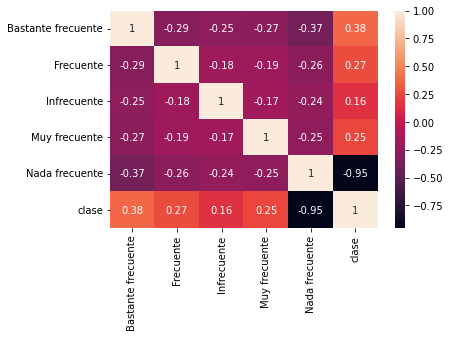

In [55]:
sns.heatmap(df_new[['Bastante frecuente','Frecuente','Infrecuente','Muy frecuente','Nada frecuente',"clase"]].corr(),annot = True)
plt.show()

Se observa:


*   A mayor cantidad de personas que no son frecuentes en celos no son violentas.
*   Mientras mas frecuente sean los celos del hombre mayor probabilidad tiende a violentar a la mujer.
* Mientras sean hombres muy frecuentes y frecuentes en ser celosos tienen probabilidades de ser violentos.




Analizaremos con las figuras el comportamientos de el atributo celoso

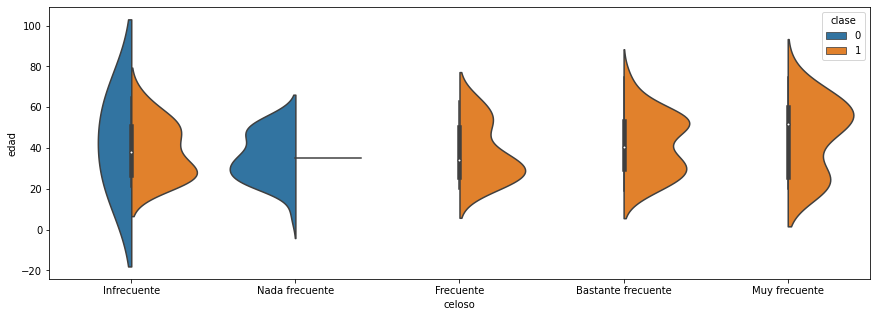

In [56]:
violencia_data.loc[violencia_data.edad == "Sesenta", 'edad'] = 60
violencia_data["edad"]=violencia_data["edad"].astype(int)

#violinplot
fig = plt.figure(figsize=(50,5))
ax2 = fig.add_subplot(132)
sns.violinplot(x="celoso", y="edad", hue="clase", data=violencia_data, split=True, ax=ax2)

#### Problema de alcohol

In [57]:
problema_alcohol =violencia_data.groupby(['problema_alcohol', 'clase']).size()
problema_alcohol

problema_alcohol    clase
Bastante frecuente  1        47
Frecuente           1        30
Infrecuente         0         4
                    1        23
Muy frecuente       1        19
Nada frecuente      0        40
                    1         4
dtype: int64

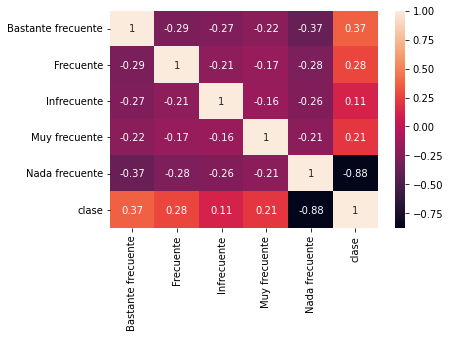

In [58]:
## correlacion con relacion al problema de alcohol
df_alcohol = pd.get_dummies(violencia_data['problema_alcohol'])
df_alcohol= pd.concat([violencia_data, df_alcohol], axis=1)
sns.heatmap(df_alcohol[['Bastante frecuente','Frecuente','Infrecuente','Muy frecuente','Nada frecuente',"clase"]].corr(),annot = True)
plt.show()

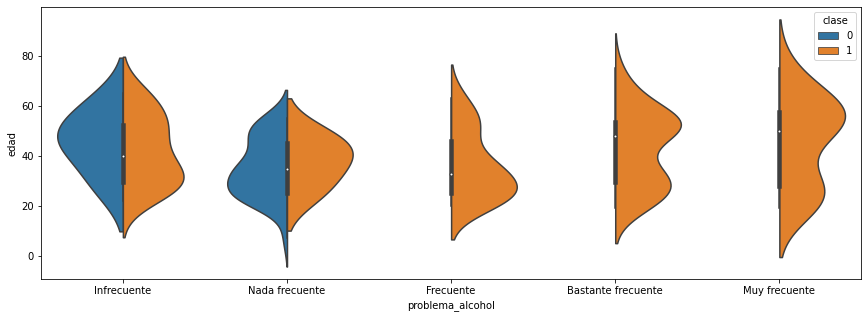

In [59]:
#violinplot
fig = plt.figure(figsize=(50,5))
ax2 = fig.add_subplot(132)
sns.violinplot(x="problema_alcohol", y="edad", hue="clase", data=violencia_data, split=True, ax=ax2)

#### Problema económico

In [60]:
problema_economico =violencia_data.groupby(['problema_economico', 'clase']).size()
problema_economico

problema_economico  clase
Bastante frecuente  1        43
Frecuente           1        31
Infrecuente         0         3
                    1        19
Muy frecuente       1        26
Nada frecuente      0        41
                    1         4
dtype: int64

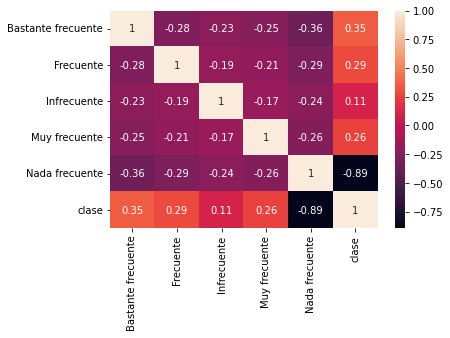

In [61]:
## correlación con relación al problema económico
df_economico = pd.get_dummies(violencia_data['problema_economico'])
df_economico= pd.concat([violencia_data, df_economico], axis=1)
sns.heatmap(df_economico[['Bastante frecuente','Frecuente','Infrecuente','Muy frecuente','Nada frecuente',"clase"]].corr(),annot = True)
plt.show()

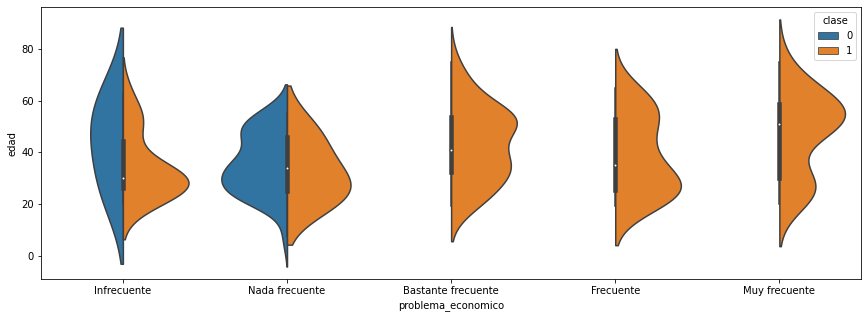

In [62]:
#violinplot
fig = plt.figure(figsize=(50,5))
ax2 = fig.add_subplot(132)
sns.violinplot(x="problema_economico", y="edad", hue="clase", data=violencia_data, split=True, ax=ax2)

#### Estrés

In [63]:
estres =violencia_data.groupby(['estres', 'clase']).size()
estres

estres              clase
Bastante frecuente  1        45
Frecuente           0         1
                    1        38
Infrecuente         0        11
                    1        19
Muy frecuente       1        21
Nada frecuente      0        32
dtype: int64

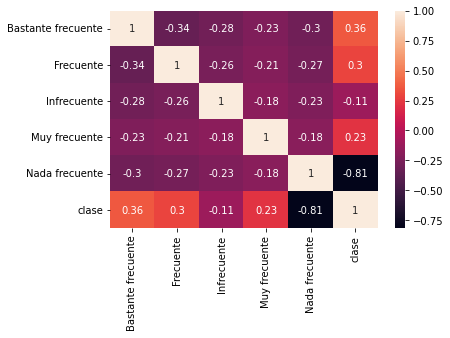

In [64]:
## correlación con relación al problema de estres
df_estres = pd.get_dummies(violencia_data['estres'])
df_estres= pd.concat([violencia_data, df_estres], axis=1)
sns.heatmap(df_estres[['Bastante frecuente','Frecuente','Infrecuente','Muy frecuente','Nada frecuente',"clase"]].corr(),annot = True)
plt.show()

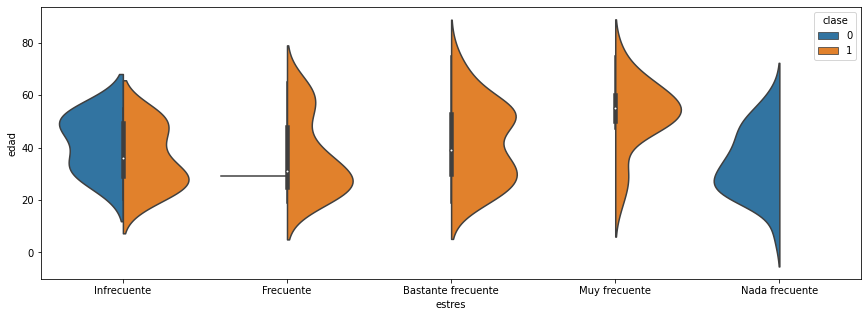

In [65]:
#violinplot
fig = plt.figure(figsize=(50,5))
ax2 = fig.add_subplot(132)
sns.violinplot(x="estres", y="edad", hue="clase", data=violencia_data, split=True, ax=ax2)

###3.3.7. Conversión a valores las características

Se ha analizado los atributos importantes respecto a la Violencia considerando el aspecto de la edad, como edad es un atributo ingresado por la mujer no se categorizará, por ende pasaremos a eliminar.

In [66]:
violencia_data.drop(["edad"],axis=1, inplace=True)
violencia_data.head(2)

,celoso,problema_alcohol,problema_economico,estres,clase
0,Infrecuente,Infrecuente,Infrecuente,Infrecuente,1
1,Nada frecuente,Infrecuente,Nada frecuente,Frecuente,0


#### Unificación de variable

In [67]:
data_final = pd.concat([mujer_data,hombre_data, violencia_data], axis=1)
data_final = data_final.T.drop_duplicates().T
data_final.head()

,edad,gestacion,estado_civil,nivel_educativo,total_hijos,clase,edad,nivel_educativo,celoso,problema_alcohol,problema_economico,estres
0,25,No,Separada,STI,0,1,27,PI,Infrecuente,Infrecuente,Infrecuente,Infrecuente
1,28,No,Soltera,SUI,0,0,29,SUI,Nada frecuente,Infrecuente,Nada frecuente,Frecuente
2,40,No,Conviviente,SUC,2,1,48,SUI,Infrecuente,Nada frecuente,Nada frecuente,Infrecuente
3,27,No,Conviviente,STC,1,1,33,STC,Frecuente,Infrecuente,Infrecuente,Frecuente
4,27,No,Soltera,SUI,0,1,26,PI,Frecuente,Frecuente,Infrecuente,Frecuente


#### Renombre

In [68]:
data_final = data_final.set_axis(['edad_mujer', 'gestacion', 'estado_civil', 'nivel_educativo_mujer', 'total_hijos',
                                  "clase","edad_hombre","nivel_educativo_hombre","celoso","problema_alcohol","problema_economico",
                                  "estres"], axis=1, inplace=False)

#### Identificación de Valores perdidos

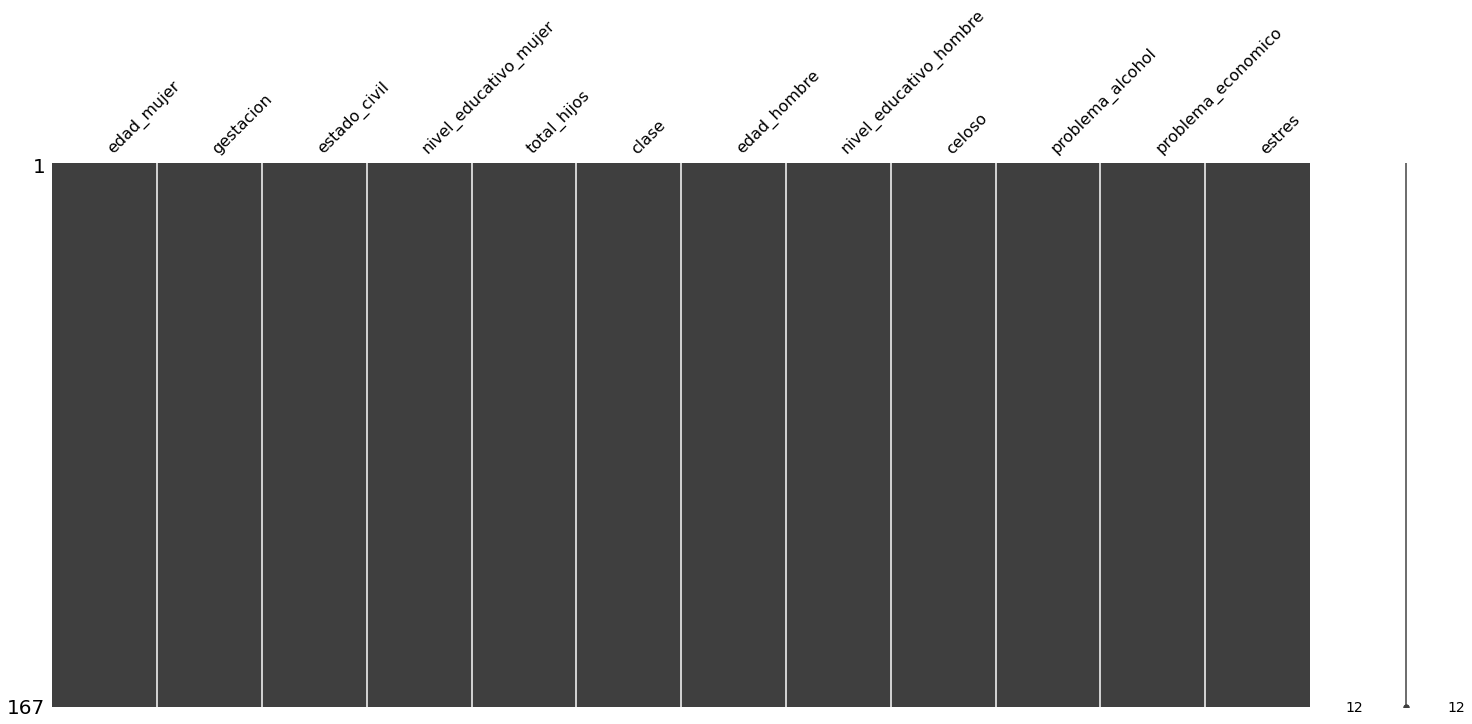

In [69]:

msno.matrix(data_final)

**Observación**
No se cuenta con valores perdidos.

#### Conversión variables cualitativas en Cuantitativas

In [70]:
data_final['gestacion'] = data_final['gestacion'].astype('category')
data_final['estado_civil'] = data_final['estado_civil'].astype('category')
data_final['nivel_educativo_mujer'] = data_final['nivel_educativo_mujer'].astype('category')
data_final['nivel_educativo_hombre'] = data_final['nivel_educativo_hombre'].astype('category')
data_final['problema_alcohol'] = data_final['problema_alcohol'].astype('category')
data_final['problema_economico'] = data_final['problema_economico'].astype('category')
data_final['estres'] = data_final['estres'].astype('category')
data_final['celoso'] = data_final['celoso'].astype('category')

data_final = pd.get_dummies(data_final,columns = ['gestacion'])
data_final = pd.get_dummies(data_final,columns = ['estado_civil'])
data_final = pd.get_dummies(data_final,columns = ['nivel_educativo_mujer'])
data_final = pd.get_dummies(data_final,columns = ['nivel_educativo_hombre'])
data_final = pd.get_dummies(data_final,columns = ['problema_alcohol'])
data_final = pd.get_dummies(data_final,columns = ['problema_economico'])
data_final = pd.get_dummies(data_final,columns = ['estres'])
data_final = pd.get_dummies(data_final,columns = ['celoso'])

#### Visualización

In [71]:
#data_final = pd.concat([data_final,gestacion,estado_civil,nivel_educativo_mujer,nivel_educativo_hombre,problema_alcohol,problema_economico,estres,celoso], axis=1)
data_final.head()

,edad_mujer,total_hijos,clase,edad_hombre,gestacion_No,gestacion_Si,estado_civil_Casada,estado_civil_Conviviente,estado_civil_Divorciada,estado_civil_Ex Conviviente,...,estres_Bastante frecuente,estres_Frecuente,estres_Infrecuente,estres_Muy frecuente,estres_Nada frecuente,celoso_Bastante frecuente,celoso_Frecuente,celoso_Infrecuente,celoso_Muy frecuente,celoso_Nada frecuente
0,25,0,1,27,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,28,0,0,29,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,40,2,1,48,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
3,27,1,1,33,1,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
4,27,0,1,26,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


# Iv. MODELADO

##4.1. Separación de datos

In [72]:
## split data
X = data_final.drop('clase', axis=1).to_numpy().astype(float)
y = data_final['clase']
y = LabelEncoder().fit_transform(y).astype(float)#convirtiendo en Onehot

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42, shuffle=True)

##4.2. Implentación de Modelo

In [73]:
import warnings
warnings.filterwarnings('ignore')

In [74]:
#LRegresion
logreg  = LogisticRegression()
logreg.fit(X_train,y_train)
acc_log_train = round(logreg.score(X_train , y_train)*100,2)
acc_log_test = round(logreg.score(X_test,y_test)*100,2)
print('Precisión: % {}'.format(acc_log_test))

Precisión: % 95.73


##4.3. Optimización de Modelo


In [75]:
#LRegresion  CON CROSS VALIDATION
num_folds = 10 # cantidad de divisiones de la data
seed = 42
kfold = KFold(n_splits=num_folds,shuffle=True, random_state=seed)
model = LogisticRegression(solver='lbfgs', max_iter=1000)
results = cross_val_score(model, X, y, cv=kfold)
print(f'Precisión: {results.mean()*100.0:,.2f}% ({results.std()*100.0:,.2f}%)')

Precisión: 98.20% (2.75%)


Se uso incialmente el modelo de Regreción Logistica, se usaran distintos modelos para la comparación.

##4.4. Comparacion con más modelos de Machine Learning

In [76]:
models = []
models.append(('Regression Logistica', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Arbol de Decisiones', DecisionTreeClassifier()))
models.append(('Naive Bayes', GaussianNB()))
models.append(('Suport Vector Machine', SVC()))

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    results.append(cv_results.mean())
    names.append(name)
    print("Presición {} : {} %".format(name,round(cv_results.mean()*100,2)))

Presición Regression Logistica : 98.2 %
Presición KNN : 89.85 %
Presición Arbol de Decisiones : 99.41 %
Presición Naive Bayes : 97.02 %
Presición Suport Vector Machine : 73.53 %


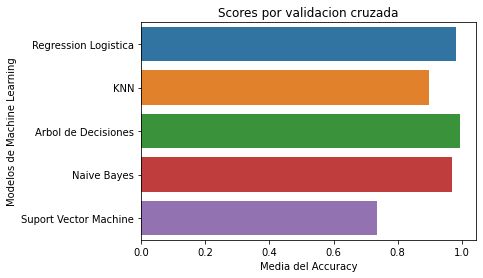

In [77]:
cv_result = pd.DataFrame({'Cross Validation Means': results, 'ML Models': ['Regression Logistica',
              'KNN',
              'Arbol de Decisiones',
              'Naive Bayes',
              'Suport Vector Machine'
                ] })

ax = sns.barplot(x='Cross Validation Means',y='ML Models',data = cv_result,errwidth=0)
ax.set_xlabel('Media del Accuracy')
ax.set_ylabel('Modelos de Machine Learning')
ax.set_title('Scores por validacion cruzada')
plt.show()

#V. EVALUACIÓN

In [78]:
data_final.loc[120]

edad_mujer                               28
total_hijos                               0
clase                                     1
edad_hombre                              30
gestacion_No                              1
gestacion_Si                              0
estado_civil_Casada                       0
estado_civil_Conviviente                  0
estado_civil_Divorciada                   0
estado_civil_Ex Conviviente               0
estado_civil_Separada                     1
estado_civil_Soltera                      0
estado_civil_Viuda                        0
nivel_educativo_mujer_PC                  0
nivel_educativo_mujer_PI                  0
nivel_educativo_mujer_SC                  0
nivel_educativo_mujer_SI                  0
nivel_educativo_mujer_SN                  0
nivel_educativo_mujer_STC                 0
nivel_educativo_mujer_STI                 0
nivel_educativo_mujer_SUC                 1
nivel_educativo_mujer_SUI                 0
nivel_educativo_hombre_PC       

In [79]:
value_to_predict=X[120]

In [80]:
result=logreg.predict([value_to_predict])
if result[0]==1:
  print("{} : Posible caso de violencia".format(result[0]))
else:
  print("{} : Posible caso de no violencia".format(result[0]))

1.0 : Posible caso de violencia
